**Does traffic volume increase during the Australian Open compared to non-AO dates (and by how much)?**

Dependent variable: traffic volume (continuous, non-negative)
Treatment/exposure: AO period (yes/no)
Structure: repeated measurements over time, by site, by year

ANOVA tests that the means of some subgroups are equal. Can conduct if we aggregate daily traffic volume by weekday.

Include weather variable

In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import datetime

site_name_dict = {"Yarra Park": 0, 
                  "Olympic Boulevard": 1, ""
                  "Flinders Street Station": 2}

traffic_df = pd.read_csv("../cleaned_data/all_traffic_volume.csv")

traffic_df["Site Name"] = traffic_df["Site Name"].map(site_name_dict)

ao_dates_dict = {
    2020: [datetime.datetime(2020, 1, 20), datetime.datetime(2020, 2, 2)],
    2021: [datetime.datetime(2021, 2, 8), datetime.datetime(2021, 2, 21)],
    2022: [datetime.datetime(2022, 1, 17), datetime.datetime(2022, 1, 30)],
    2023: [datetime.datetime(2023, 1, 16), datetime.datetime(2023, 1, 29)],
    2024: [datetime.datetime(2024, 1, 14), datetime.datetime(2024, 1, 28)],
    2025: [datetime.datetime(2025, 1, 12), datetime.datetime(2025, 1, 26)]
}

# Define treatment
traffic_df["AO dates"] = traffic_df["Year"].map(ao_dates_dict)
traffic_df[["AO_start", "AO_end"]] = pd.DataFrame(traffic_df["AO dates"].tolist(), index=traffic_df.index)
traffic_df["AO"] = traffic_df["Datetime"].between(traffic_df["AO_start"], traffic_df["AO_end"]).astype(int)

traffic_df = traffic_df.drop(columns=traffic_df.columns[-5:-1])

traffic_df

,Site Number,Year,Month,Day,Weekday,Number of Recorded Periods,Total Traffic Volume,Traffic Hour 1,Traffic Hour 2,Traffic Hour 3,...,Traffic Hour 18,Traffic Hour 19,Traffic Hour 20,Traffic Hour 21,Traffic Hour 22,Traffic Hour 23,Traffic Hour 24,Site Name,Datetime,AO
0,1052,2023,1,1,6,384,5618,284,314,290,...,269,247,201,230,227,179,8484,0,2023-01-01,0
1,1052,2023,1,2,0,96,1743,38,41,22,...,91,83,85,65,63,48,2122,0,2023-01-02,0
2,1052,2023,1,3,1,96,2994,26,27,17,...,177,194,111,134,180,85,2123,0,2023-01-03,0
3,1052,2023,1,4,2,192,4699,66,62,28,...,263,195,187,210,189,228,4248,0,2023-01-04,0
4,1052,2023,1,5,3,192,5071,86,50,30,...,267,206,208,225,272,221,4250,0,2023-01-05,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18021,4570,2021,12,20,0,96,2947,63,32,30,...,140,128,138,138,124,86,2149,2,2021-12-20,0
18022,4570,2021,12,21,1,96,2810,14,13,11,...,158,143,142,156,142,89,2150,2,2021-12-21,0
18023,4570,2021,12,23,3,96,2970,30,13,23,...,160,150,157,191,181,159,2152,2,2021-12-23,0
18024,4570,2021,12,24,4,96,2728,25,15,15,...,139,149,118,162,178,143,2153,2,2021-12-24,0


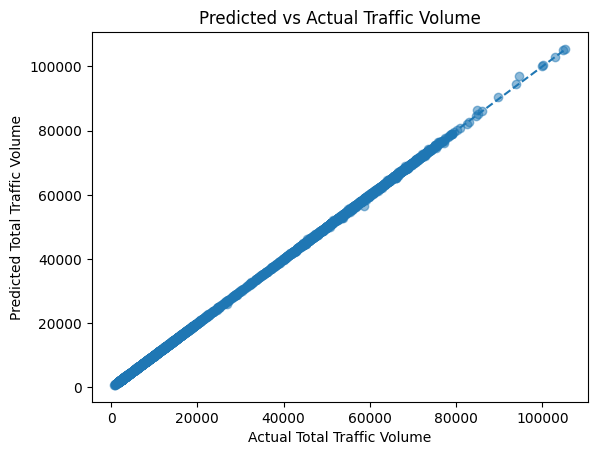

In [3]:
X = traffic_df[traffic_df.drop(columns=["Number of Recorded Periods", "Total Traffic Volume", "Datetime"]).columns]
y = traffic_df["Total Traffic Volume"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.figure()
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    linestyle="--"
)
plt.xlabel("Actual Total Traffic Volume")
plt.ylabel("Predicted Total Traffic Volume")
plt.title("Predicted vs Actual Traffic Volume")
plt.show()

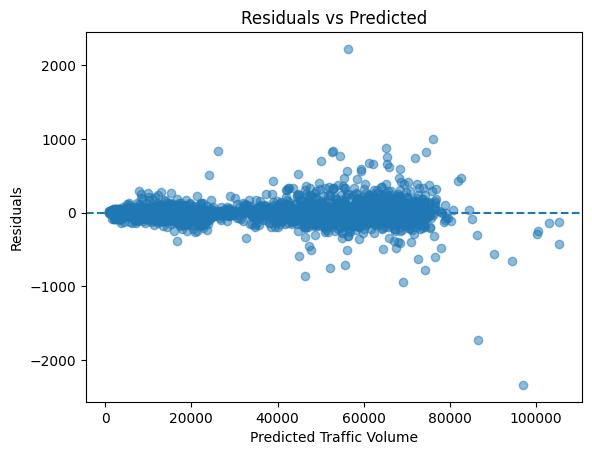

In [4]:
residuals = y_test - y_pred

plt.figure()
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, linestyle="--")
plt.xlabel("Predicted Traffic Volume")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()


Remove collinear variables i.e. traffic hour

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import pandas as pd

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LinearRegression())
])

pipe.fit(X_train, y_train)

importance = pd.Series(
    pipe.named_steps["model"].coef_,
    index=X.columns
).sort_values(key=abs, ascending=False)

importance


Traffic Hour 15    1510.025324
Traffic Hour 11    1507.007947
Traffic Hour 16    1460.011011
Traffic Hour 9     1458.125427
Traffic Hour 17    1438.990423
Traffic Hour 13    1435.148950
Traffic Hour 14    1422.951108
Traffic Hour 10    1406.184510
Traffic Hour 12    1340.507654
Traffic Hour 18    1319.045185
Traffic Hour 8     1317.604215
Traffic Hour 7     1310.358389
Traffic Hour 20    1213.226534
Traffic Hour 19    1210.619386
Traffic Hour 21    1156.271851
Traffic Hour 6     1141.620566
Traffic Hour 1     1108.274343
Traffic Hour 22    1047.396371
Traffic Hour 23     916.321997
Traffic Hour 5      723.425508
Traffic Hour 3      353.889232
Traffic Hour 2      328.268262
Traffic Hour 4      282.571560
AO                   18.588261
Site Name            16.319082
Site Number         -15.166421
Weekday              12.194039
Month                 2.588924
Year                  1.156907
Traffic Hour 24       1.038466
Day                   0.199172
dtype: float64

In [6]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

X_vif = X.assign(const=1)  # add intercept

vif = pd.DataFrame({
    "variable": X_vif.columns,
    "VIF": [
        variance_inflation_factor(X_vif.values, i)
        for i in range(X_vif.shape[1])
    ]
})

vif

,variable,VIF
0,Site Number,7.476693e+00
1,Year,1.208301e+00
2,Month,1.131156e+00
3,Day,1.019015e+00
4,Weekday,1.704116e+00
5,Traffic Hour 1,3.096699e+01
6,Traffic Hour 2,3.767530e+01
7,Traffic Hour 3,3.570791e+01
8,Traffic Hour 4,2.719831e+01
9,Traffic Hour 5,4.207236e+01


In [7]:
X.dtypes

Site Number        int64
Year               int64
Month              int64
Day                int64
Weekday            int64
Traffic Hour 1     int64
Traffic Hour 2     int64
Traffic Hour 3     int64
Traffic Hour 4     int64
Traffic Hour 5     int64
Traffic Hour 6     int64
Traffic Hour 7     int64
Traffic Hour 8     int64
Traffic Hour 9     int64
Traffic Hour 10    int64
Traffic Hour 11    int64
Traffic Hour 12    int64
Traffic Hour 13    int64
Traffic Hour 14    int64
Traffic Hour 15    int64
Traffic Hour 16    int64
Traffic Hour 17    int64
Traffic Hour 18    int64
Traffic Hour 19    int64
Traffic Hour 20    int64
Traffic Hour 21    int64
Traffic Hour 22    int64
Traffic Hour 23    int64
Traffic Hour 24    int64
Site Name          int64
AO                 int64
dtype: object

Dependent variable:
- Hourly traffic volume

Independent variables: 
- Site Number
- Year
- Month
- Day
- Hour
- Weekday
- Morning/afternoon/evening status
- Weekday/weekend status`

- AO date status
- Quarantine status
- Weather
- IsPublicHoliday
- Time since last quarantine release
- Road closures
- Overseas visitors influx / short term visitor arrivals
- School holidays
- Number of lanes at traffic site
- Distance to AO venue (don't filter sites previously)

- AODayNumber
- AOWeekend
- AOFinals

Feature engineering is completed here